In [1]:
import os

def count_jpg_files(folder_path):
    jpg_count = 0
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg'):
            jpg_count += 1
    return jpg_count

data_dir = "datasets"
folders = ['test', 'train', 'valid']
total = 2426
for folder in folders:
    pth = os.path.join(data_dir, folder)
    jpg_count = count_jpg_files(pth)
    print(f"Number of JPEG files in {folder}: {jpg_count}, percentage:{jpg_count*100/total:.0f}%")


Number of JPEG files in test: 242, percentage:10%
Number of JPEG files in train: 1716, percentage:71%
Number of JPEG files in valid: 468, percentage:19%


In [2]:
import matplotlib.pyplot as plt

from pycocotools.coco import COCO
from PIL import Image

dataDir = "datasets"
annVal = os.path.join(dataDir, 'test', '_annotations.coco.json')

coco = COCO(annVal)
print(coco)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [3]:
dentIds = coco.getCatIds(catNms=['dent']) 
print(f'dent index: \n{dentIds}\n')

dent index: 
[1]



In [4]:
ids = coco.getImgIds()

imgIds = ids[36]
annIds = coco.getAnnIds(imgIds = imgIds)
anns = coco.loadAnns(annIds)

print(f"101th image's annotations: \n{anns}\n")

101th image's annotations: 
[{'id': 57, 'image_id': 36, 'category_id': 1, 'bbox': [140, 283, 206.154, 112.308], 'area': 23152.743, 'segmentation': [[290.769, 387.692, 309.231, 383.077, 323.077, 395.385, 333.846, 392.308, 346.154, 323.077, 343.077, 298.462, 313.846, 303.077, 290.769, 315.385, 253.846, 316.923, 229.231, 309.231, 198.462, 283.077, 158.462, 289.231, 147.692, 312.308, 140, 353.846, 147.692, 367.692, 173.846, 373.846, 200, 350.769, 210.769, 350.769, 252.308, 386.154, 284.615, 395.385, 290.769, 387.692]], 'iscrowd': 0}, {'id': 58, 'image_id': 36, 'category_id': 3, 'bbox': [331, 414, 35.385, 61.539], 'area': 2177.558, 'segmentation': [[335.385, 430.769, 330.769, 469.231, 336.923, 475.385, 356.923, 475.385, 360, 470.769, 366.154, 424.615, 358.462, 413.846, 344.615, 416.923, 335.385, 430.769]], 'iscrowd': 0}, {'id': 59, 'image_id': 36, 'category_id': 3, 'bbox': [418, 497, 60, 98.462], 'area': 5907.72, 'segmentation': [[429.231, 498.462, 418.462, 512.308, 427.692, 561.538, 446.15

In [5]:
imgInfo = coco.loadImgs(imgIds)
print(f'imgInfo: \n{imgInfo}\n')
print(f"fileName: \n{imgInfo[0]['file_name']}")

imgInfo: 
[{'id': 36, 'license': 1, 'file_name': 'Img271_jpg.rf.2fe546a7858fd23ac87be39538029380.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-05-12T07:03:37+00:00'}]

fileName: 
Img271_jpg.rf.2fe546a7858fd23ac87be39538029380.jpg


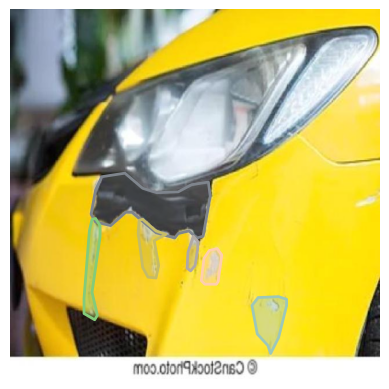

In [6]:
imageName = os.path.join(dataDir, 'test', imgInfo[0]['file_name'])
image = Image.open(imageName).convert('RGB')

plt.axis(False)
plt.imshow(image)
coco.showAnns(anns, draw_bbox = False)

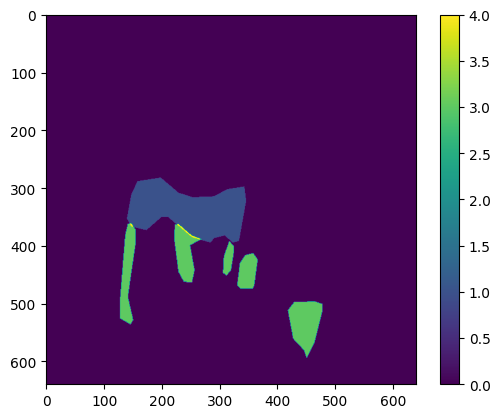

In [7]:
mask = coco.annToMask(anns[0]) * 0
for i in range(len(anns)):
    mask += coco.annToMask(anns[i]) * anns[i]["category_id"]

plt.imshow(mask)
plt.colorbar()

In [8]:
def plot_bar(dictionary, title):
    keys = list(dictionary.keys())[1:]
    values = list(dictionary.values())[1:]

    bars = plt.bar(keys, values)
    plt.xlabel('Items')
    plt.ylabel('Counts')
    plt.title(title)
    plt.xticks(keys)
    bar_color = bars[0].get_facecolor()
    ymin, ymax = plt.gca().get_ylim()
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2,
                bar.get_height() + (ymax - ymin) * 0.01,
                round(bar.get_height(), 1),
                horizontalalignment='center',
                color=bar_color,
                weight='bold')

    plt.show()

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
datasets\train/_annotations.coco.json class count: {'car-damages': 0, 'dent': 640, 'glass_break': 538, 'scratch': 1371, 'smash': 615}
datasets\train/_annotations.coco.json class percentage: {'car-damages': '0.00%', 'dent': '20.23%', 'glass_break': '17.00%', 'scratch': '43.33%', 'smash': '19.44%'}


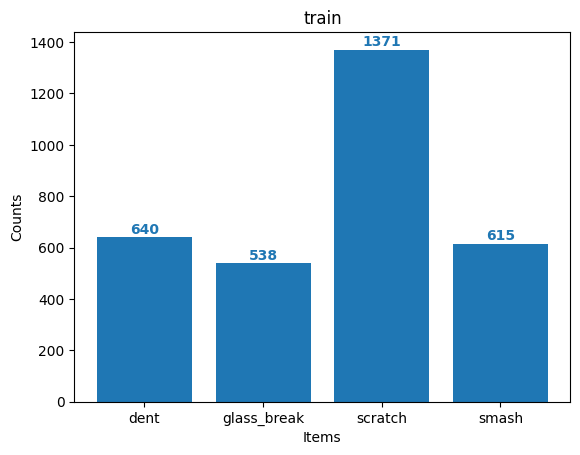

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
datasets\valid/_annotations.coco.json class count: {'car-damages': 0, 'dent': 217, 'glass_break': 141, 'scratch': 253, 'smash': 176}
datasets\valid/_annotations.coco.json class percentage: {'car-damages': '0.00%', 'dent': '27.57%', 'glass_break': '17.92%', 'scratch': '32.15%', 'smash': '22.36%'}


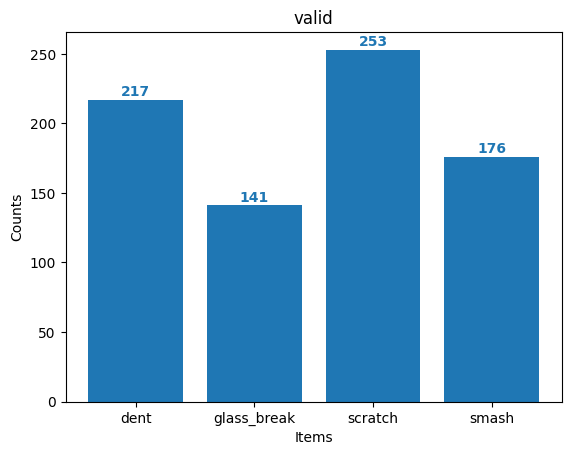

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
datasets\test/_annotations.coco.json class count: {'car-damages': 0, 'dent': 76, 'glass_break': 77, 'scratch': 166, 'smash': 91}
datasets\test/_annotations.coco.json class percentage: {'car-damages': '0.00%', 'dent': '18.54%', 'glass_break': '18.78%', 'scratch': '40.49%', 'smash': '22.20%'}


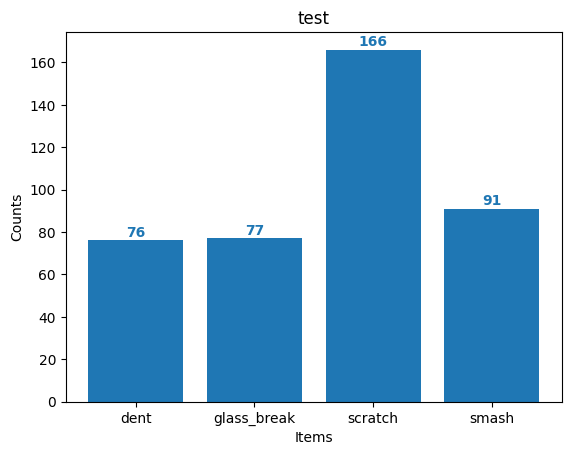

car-damages: 0
dent: 933
glass_break: 756
scratch: 1790
smash: 882


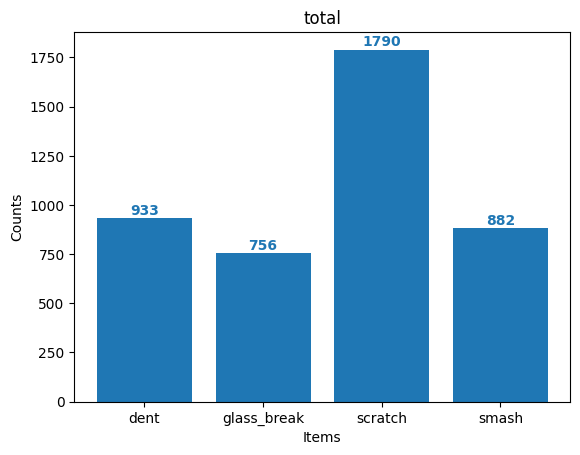

In [9]:
from pycocotools.coco import COCO

def count_instances_per_class(annotations_file):
    coco = COCO(annotations_file)

    category_ids = coco.getCatIds()
    categories = coco.loadCats(category_ids)
    category_names = [category['name'] for category in categories]

    class_counts = {category_name: 0 for category_name in category_names}

    image_ids = coco.getImgIds()
    for image_id in image_ids:
        annotations_ids = coco.getAnnIds(imgIds=image_id)
        annotations = coco.loadAnns(annotations_ids)

        for annotation in annotations:
            category_id = annotation['category_id']
            category_name = coco.loadCats(category_id)[0]['name']
            class_counts[category_name] += 1
    print(f"{annotations_file} class count: {class_counts}")
    
    total_instances = 0
    for value in class_counts.values():
        total_instances += value

    percentage_per_class = {class_name: f"{(count / total_instances) * 100:.2f}%" for class_name, count in class_counts.items()}
    print(f"{annotations_file} class percentage: {percentage_per_class}")
    return class_counts

train_annotations_file = os.path.join(data_dir, 'train/_annotations.coco.json')
valid_annotations_file = os.path.join(data_dir, 'valid/_annotations.coco.json')
test_annotations_file = os.path.join(data_dir, 'test/_annotations.coco.json')

train_counts = count_instances_per_class(train_annotations_file)
plot_bar(train_counts, "train")
valid_counts = count_instances_per_class(valid_annotations_file)
plot_bar(valid_counts, "valid")
test_counts = count_instances_per_class(test_annotations_file)
plot_bar(test_counts, "test")

total_counts = {}
for class_name in train_counts.keys():
    total_counts[class_name] = train_counts[class_name] + valid_counts[class_name] + test_counts[class_name]

for category_name, count in total_counts.items():
    print(f"{category_name}: {count}")

plot_bar(total_counts, "total")

In [10]:
import os
import glob

import torch
from torchvision.io import read_image
import numpy as np

means = 0
stds = 0

jpg_files = glob.glob("datasets/train/*.jpg")

for filename in jpg_files:
    # CHW, RGB
    img = read_image(filename)

    img_float = img.float() / 255.0

    mean = torch.mean(img_float, dim=(1, 2))
    std = torch.std(img_float, dim=(1, 2))

    means += mean
    stds += std

means /= len(jpg_files)
stds /= len(jpg_files)

print("Overall mean of each channel (R, G, B):", means)
print("Overall standard deviation of each channel (R, G, B):", stds)


Overall mean of each channel (R, G, B): tensor([0.5735, 0.5618, 0.5681])
Overall standard deviation of each channel (R, G, B): tensor([0.2341, 0.2348, 0.2343])


loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


100%|██████████| 1716/1716 [01:11<00:00, 23.87it/s]


Number 0: 576200158 occurrences
Number 4: 49255443 occurrences
Number 2: 40978952 occurrences
Number 3: 15237691 occurrences
Number 1: 21201356 occurrences


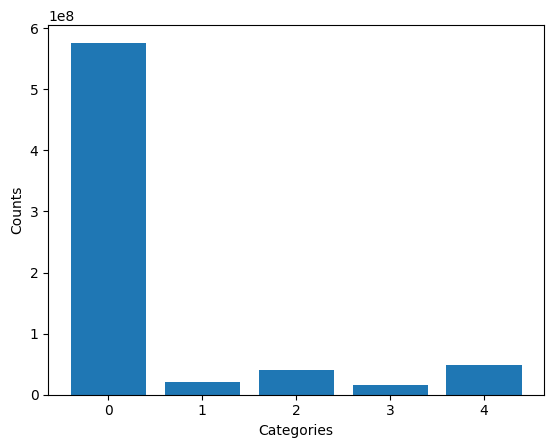

In [19]:
def poly_to_mask(img_info, anns):
    anns_img = np.zeros((img_info['height'],img_info['width']))
    for ann in anns:
        anns_img = np.maximum(anns_img, coco.annToMask(ann)*ann['category_id'])
    
    return anns_img.astype(int)

annoFile = os.path.join("datasets", "train", "_annotations.coco.json")
coco = COCO(annoFile)
image_ids = coco.getImgIds()

from collections import Counter
from tqdm import tqdm
total_counts = Counter()
for image_id in tqdm(image_ids):
    image_info = coco.loadImgs(image_id)[0]
    annIds = coco.getAnnIds(imgIds = image_id)
    anns = coco.loadAnns(annIds)
    
    mask = poly_to_mask(image_info, anns).flatten()
    total_counts.update(mask)

for num, count in total_counts.items():
    print(f"Number {num}: {count} occurrences")

labels, values = zip(*total_counts.items())
plt.bar(labels, values)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()

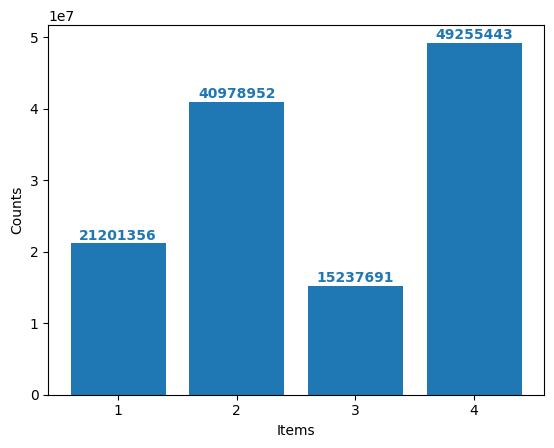

In [21]:
plot_bar(total_counts, None)